# ACT-R Simon Task

This script is to play with the ACT-R Simon Model created by A.S.(2017)

The Simon Task demo is here: https://www.psytoolkit.org/experiment-library/experiment_simon.html 

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010027717300598-gr6.jpg" width="400"/>

# Updated ACT-R Simon Model with Motivation Component

This updated model (simon-motivation-model) implements a simple motivation component in GOAL buffer 


<img src="https://docs.google.com/drawings/d/e/2PACX-1vS_YKK6E75H-XYmQMRBH1xLt7vjmDSMrB0Ykgw0AnppxTx2KwN5OiReoi77Hr5xkdfKc8kVmMDgrYuQ/pub?w=1359&h=1561" width="400"/>

## Motivation Parameter in count unit

In this model (**simon-motivation-model1**), motivation parameter refers to "the maximum times(counts) of retrieval" before giving a response. (Motivation parameter has to be an positive integer, default value is 1). For instance, 

- motivation parameter = 1, it means that the model would never check the rule. 
- motivation parameter = 2, it means the model only have *ONE* chance of checking the rule. As a problem is detected, the model would redo once. But no matter what rule being retrieved, it will respond with the available answer. 
- motivation paramter = 10, it means that the model would go back *AT MOST 9* times before giving a response. However, if the retrieved rule passes the check (check-pass) fires, there is no need to redo the retrieve, the model would proceed with the correct answer. 


## Motivation Parameter in time unit


In this model(**simon-motivation-model2**), motivation parameter is like a mental clock, refering to "the maximum time (in sec) it would spend before providing response. Now, motivation parameter is in second unit, so it should be a float number. For instance,

- motivation paramter = 1.5, it means that when model's mental clock exceeds motivation clock (> 1.5s), it would stop checking the rule anymore, but if the mental clock is within the motivation clock(< 1.5s), it would continue retrieving and checking the rule. 


In [1]:
from simon_device import *
import actr
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ACT-R connection has been started.


## Enable reward delivery

The simulation below disabled reward dellivery

In [2]:
task_motiv1 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, 
                             param_set={"production_reward_pairs":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})

# CONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 607.25 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 597.55 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.70, Response Times = 588.80 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.40, Response Times = 586.15 ms

######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  1 <<
>> production_reward_pairs param:  [('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)] <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 607.25 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 597.55 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.70, Response Times = 588.80 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.40, Response Times = 586.15 ms


In [3]:
task_motiv2 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, 
                             param_set={"motivation":2, "production_reward_pairs":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 601.30 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 678.55 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 659.10 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 702.55 ms

######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  2 <<
>> production_reward_pairs param:  [('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)] <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 601.30 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 678.55 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 659.10 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 702.55 ms


In [4]:
task_motiv3 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, param_set={"motivation":3, "reward":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 594.75 ms
# CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 633.85 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 704.95 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 758.85 ms

#|Warning: Parameter :REWARD is not the name of an available parameter |#
######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  3 <<
>> production_reward_pairs param:  None <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 594.75 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 633.85 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 704.95 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 758.85 ms


In [5]:
task_motiv4 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, param_set={"motivation":10, "reward":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 579.80 ms
# CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 704.70 ms
# INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 711.35 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 962.40 ms

#|Warning: Parameter :REWARD is not the name of an available parameter |#
######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  10 <<
>> production_reward_pairs param:  None <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 579.80 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 704.70 ms
INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 711.35 ms
INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 962.40 ms


### Human data

In [6]:
BOKSEM1 = pd.DataFrame({'condition':['incongruent', 'congruent'], 'accuracy':[1-0.153, 1-0.075], 'response_time':[0.483, 0.451]}) 
BOKSEM2 = pd.DataFrame({'condition':['invalid', 'valid'], 'accuracy':[1-0.157, 1-0.071], 'response_time':[0.488, 0.446]}) 

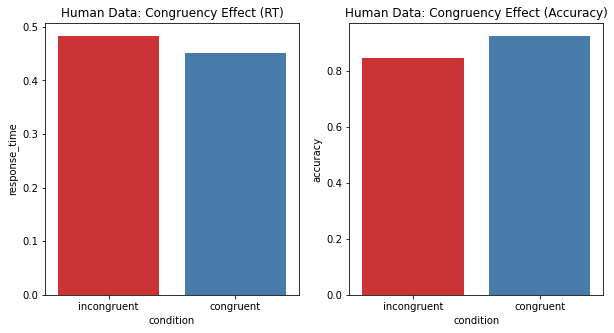

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x="condition", y="response_time",data=BOKSEM1, ax=axes[0], palette="Set1").set(title='Human Data: Congruency Effect (RT)')
sns.barplot(x="condition", y="accuracy", data=BOKSEM1, ax=axes[1], palette="Set1").set(title='Human Data: Congruency Effect (Accuracy)')
plt.show()

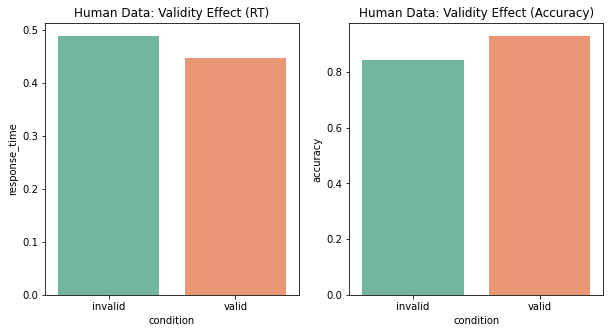

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x="condition", y="response_time",data=BOKSEM2, ax=axes[0], palette="Set2").set(title='Human Data: Validity Effect (RT)')
sns.barplot(x="condition", y="accuracy", data=BOKSEM2, ax=axes[1], palette="Set2").set(title='Human Data: Validity Effect (Accuracy)')
plt.show()

### Motivation-Model (in Count) Data

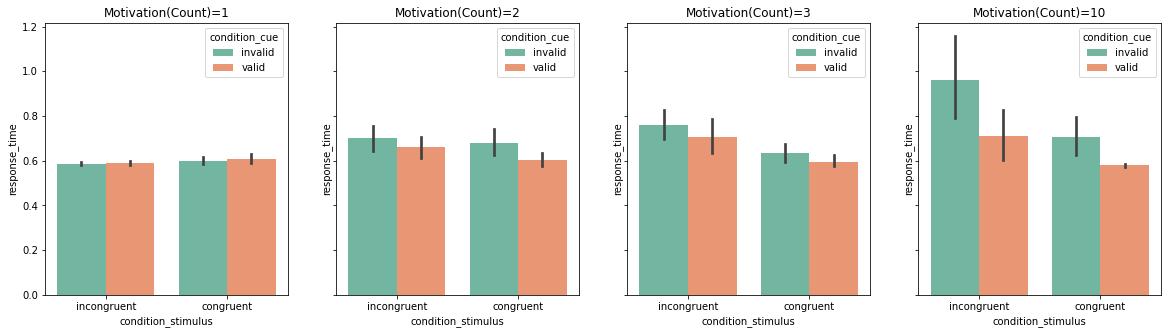

In [9]:
# fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
# sns.boxplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), whis=np.inf, ax=axes[0]).set(title='Motivation(Count)=1')
# sns.boxplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), whis=np.inf, ax=axes[1]).set(title='Motivation(Count)=2')
# sns.boxplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), whis=np.inf, ax=axes[2]).set(title='Motivation(Count)=3')
# sns.boxplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), whis=np.inf, ax=axes[3]).set(title='Motivation(Count)=10')
# plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation(Count)=1')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation(Count)=2')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation(Count)=3')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation(Count)=10')
plt.show()

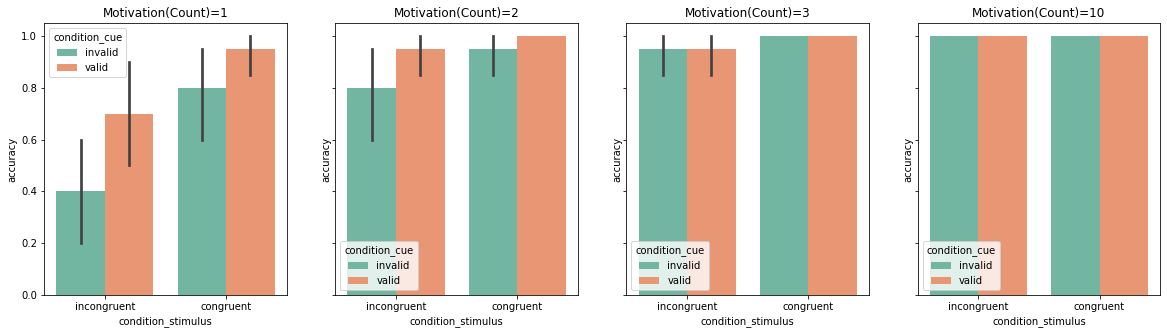

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation(Count)=1')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation(Count)=2')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation(Count)=3')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation(Count)=10')
plt.show()

### Post Error Speeding

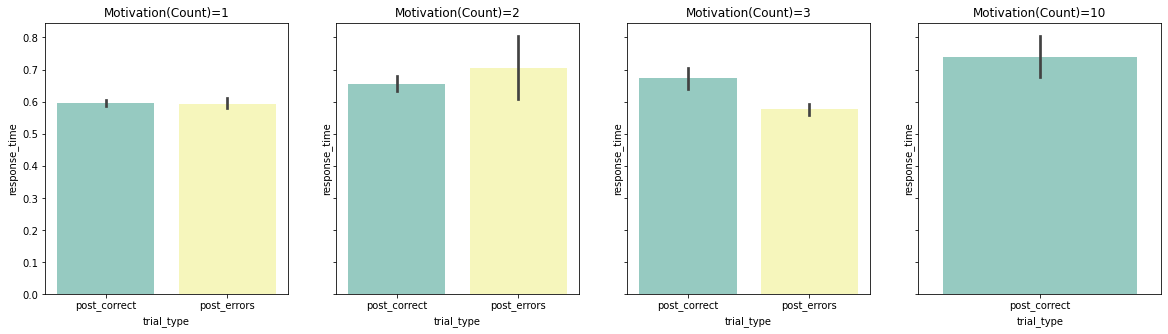

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv1.df_stats_post_error(), ax=axes[0]).set(title='Motivation(Count)=1')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv2.df_stats_post_error(), ax=axes[1]).set(title='Motivation(Count)=2')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv3.df_stats_post_error(), ax=axes[2]).set(title='Motivation(Count)=3')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv4.df_stats_post_error(), ax=axes[3]).set(title='Motivation(Count)=10')
plt.show()

## Disable reward delivery

The simulation below disabled reward dellivery

In [12]:
task_motiv1 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, param_set={"motivation":1})

# CONGRUENT-VALID (N=20): Accuracy = 0.90, Response Times = 591.65 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 596.10 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.65, Response Times = 593.85 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.50, Response Times = 588.60 ms

######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  1 <<
>> production_reward_pairs param:  None <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 0.90, Response Times = 591.65 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 596.10 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.65, Response Times = 593.85 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.50, Response Times = 588.60 ms


In [13]:
task_motiv2 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, param_set={"motivation":2})

# CONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 656.15 ms
# CONGRUENT-INVALID (N=20): Accuracy = 0.85, Response Times = 677.20 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.85, Response Times = 659.45 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.75, Response Times = 743.90 ms

######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  2 <<
>> production_reward_pairs param:  None <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 656.15 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.85, Response Times = 677.20 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.85, Response Times = 659.45 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.75, Response Times = 743.90 ms


In [14]:
task_motiv3 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, param_set={"motivation":3})

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 594.75 ms
# CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 633.85 ms
# INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 704.95 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 758.85 ms

######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  3 <<
>> production_reward_pairs param:  None <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 594.75 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 633.85 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 704.95 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 758.85 ms


In [15]:
task_motiv4 = run_experiment(model="simon-motivation-model1", visible=False, trace=False, param_set={"motivation":10})

# CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 579.80 ms
# CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 704.70 ms
# INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 711.35 ms
# INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 962.40 ms

######### LOADED MODEL simon-motivation-model1 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  10 <<
>> production_reward_pairs param:  None <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 579.80 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 704.70 ms
INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 711.35 ms
INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 962.40 ms


### Model data

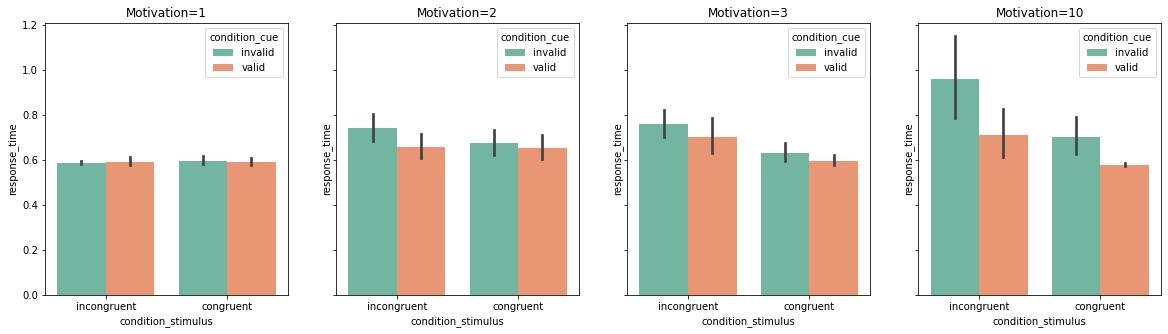

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation=10')
plt.show()

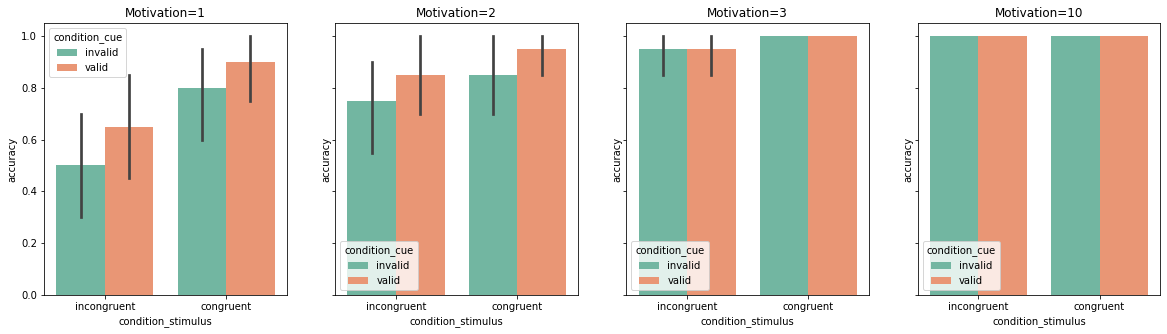

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation=1')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation=10')
plt.show()

### Post Error Slowing

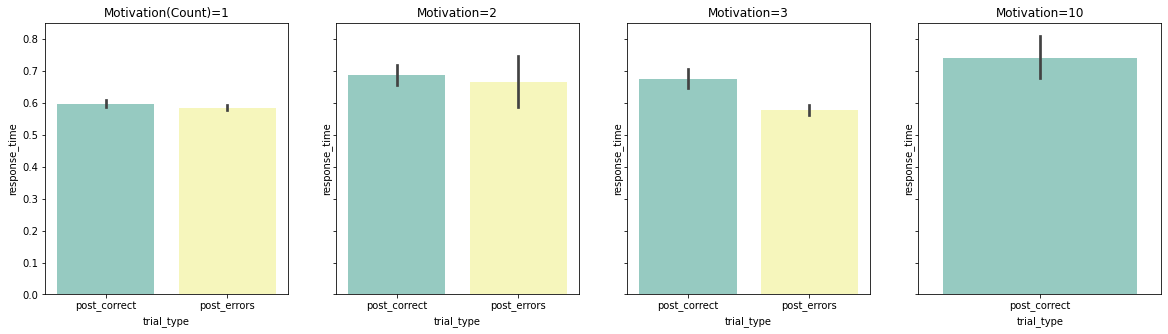

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv1.df_stats_post_error(), ax=axes[0]).set(title='Motivation(Count)=1')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv2.df_stats_post_error(), ax=axes[1]).set(title='Motivation=2')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv3.df_stats_post_error(), ax=axes[2]).set(title='Motivation=3')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv4.df_stats_post_error(), ax=axes[3]).set(title='Motivation=10')
plt.show()

### Motivation-Model (in Time) Data

In [19]:
task_motiv1 = run_experiment(model="simon-motivation-model2", visible=False, trace=False, 
                             param_set={"motivation":0.1, "production_reward_pairs":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})


######### LOADED MODEL simon-motivation-model2 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  0.1 <<
>> production_reward_pairs param:  [('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)] <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 607.25 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 597.55 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.70, Response Times = 588.80 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.40, Response Times = 586.15 ms


In [20]:
task_motiv2 = run_experiment(model="simon-motivation-model2", visible=False, trace=False, 
                             param_set={"motivation":0.9, "production_reward_pairs":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})


######### LOADED MODEL simon-motivation-model2 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  0.9 <<
>> production_reward_pairs param:  [('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)] <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 601.30 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 678.55 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 659.10 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 702.55 ms


In [21]:
task_motiv3 = run_experiment(model="simon-motivation-model2", visible=False, trace=False, 
                             param_set={"motivation":1.5, "production_reward_pairs":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})


######### LOADED MODEL simon-motivation-model2 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  1.5 <<
>> production_reward_pairs param:  [('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)] <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 601.30 ms
CONGRUENT-INVALID (N=20): Accuracy = 0.95, Response Times = 678.55 ms
INCONGRUENT-VALID (N=20): Accuracy = 0.95, Response Times = 659.10 ms
INCONGRUENT-INVALID (N=20): Accuracy = 0.80, Response Times = 702.55 ms


In [22]:
task_motiv4 = run_experiment(model="simon-motivation-model2", visible=False, trace=False, 
                             param_set={"motivation":5, "production_reward_pairs":[('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)]})


######### LOADED MODEL simon-motivation-model2 #########
>> ACT-R:  {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
>> motivation param:  5 <<
>> production_reward_pairs param:  [('CHECK-PASS', 0.1), ('CHECK-DETECT-PROBLEM-UNLIMITED', -0.1), ('RETRIEVE-FAILURE', -0.1), ('RESPOND', 0.1)] <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 620.50 ms
CONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 639.10 ms
INCONGRUENT-VALID (N=20): Accuracy = 1.00, Response Times = 659.20 ms
INCONGRUENT-INVALID (N=20): Accuracy = 1.00, Response Times = 857.95 ms


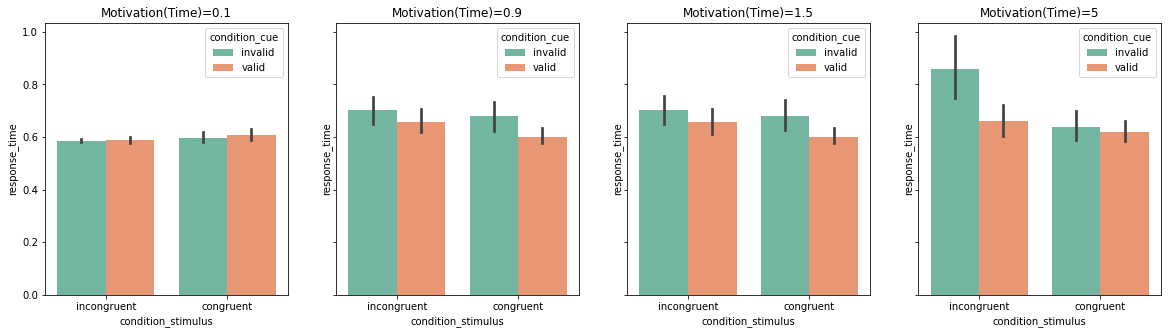

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation(Time)=0.1')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation(Time)=0.9')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation(Time)=1.5')
sns.barplot(x="condition_stimulus", y="response_time", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation(Time)=5')
plt.show()

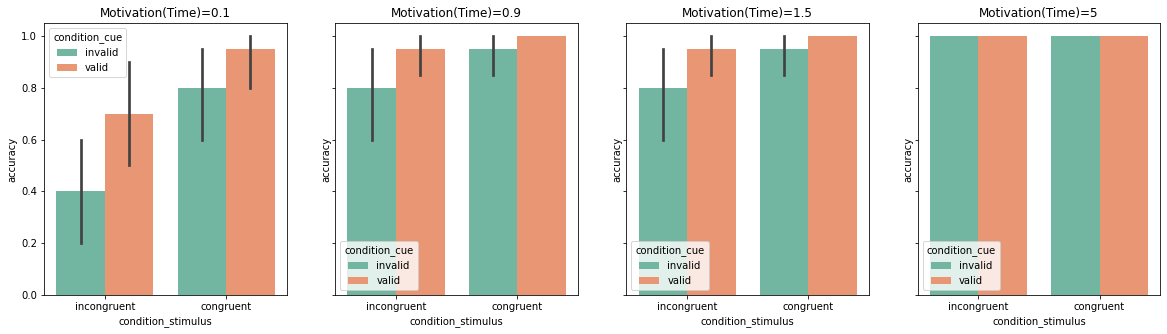

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv1.df_stats_model_outputs(), ax=axes[0]).set(title='Motivation(Time)=0.1')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv2.df_stats_model_outputs(), ax=axes[1]).set(title='Motivation(Time)=0.9')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv3.df_stats_model_outputs(), ax=axes[2]).set(title='Motivation(Time)=1.5')
sns.barplot(x="condition_stimulus", y="accuracy", hue="condition_cue", palette="Set2", data=task_motiv4.df_stats_model_outputs(), ax=axes[3]).set(title='Motivation(Time)=5')
plt.show()

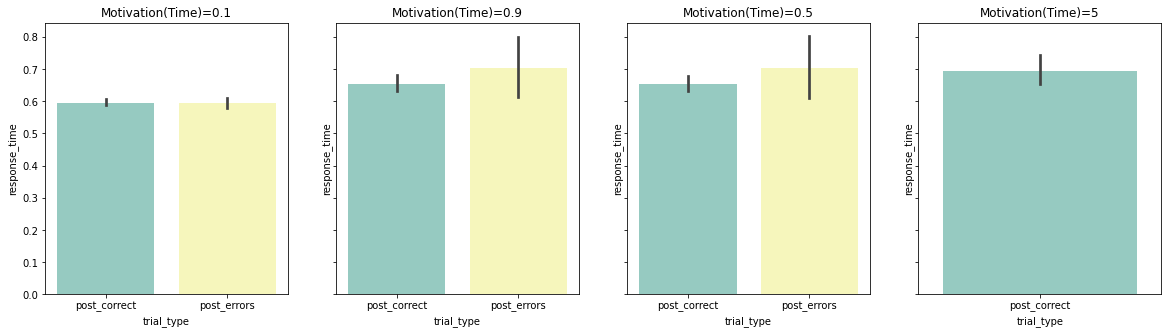

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv1.df_stats_post_error(), ax=axes[0]).set(title='Motivation(Time)=0.1')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv2.df_stats_post_error(), ax=axes[1]).set(title='Motivation(Time)=0.9')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv3.df_stats_post_error(), ax=axes[2]).set(title='Motivation(Time)=0.5')
sns.barplot(x="trial_type", y="response_time", palette="Set3", data=task_motiv4.df_stats_post_error(), ax=axes[3]).set(title='Motivation(Time)=5')
plt.show()